In [1]:
import os.path as op
import os
import pandas as pd
import glob
import scipy.stats
import pickle
import numpy as np
import math
os.chdir('../')
import datastruct
import seaborn as sns
import matplotlib.pyplot as plt
import moss
%matplotlib inline

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
data_path = op.abspath('./data/')
sub_list = ['ian']

In [3]:
for sub in sub_list:
    sub_df = []

    files = glob.glob(op.join(data_path,'*' + sub + '_*.pkl'))
    files = [x for x in files if 'switch' in x]
    
    for n,f in enumerate(files):
        with open(f, 'rb') as f:
            p = pickle.load(f)
            
            df = pd.DataFrame({'rule': p.active_rule,
                   'rt':p.rt,
                   'resp':p.resp,
                   'correct_resp':p.correct_resp,
                   'correct':p.correct,
                    'block':n,
                  'color_coherence': p.coherences['color'],
                  'motion_coherence': p.coherences['motion'],
                  'shape_coherence': p.coherences['shape']})
            sub_df.append(df.copy())
            
df = pd.concat(sub_df)


In [4]:

#get coherence for chosen rule
coherence = []
for row in df.iterrows():
    
    if row[1]['rule'] == 'motion':
        coherence.append(row[1]['motion_coherence'])
        
    if row[1]['rule'] == 'color':
        coherence.append(row[1]['color_coherence'])
        
    if row[1]['rule'] == 'shape':
        coherence.append(row[1]['shape_coherence'])
df['coherence'] = coherence

In [5]:
#get color and shape on the same scale
coherence_remap = []
for coherence, rule in zip(df['coherence'],df['rule']):
    if rule in ['color','shape']:
        coh = coherence - .5
    else:
        coh = coherence/2.0
    coherence_remap.append(coh)
    
df['coherence_remap'] = coherence_remap

/Users/ianballard/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


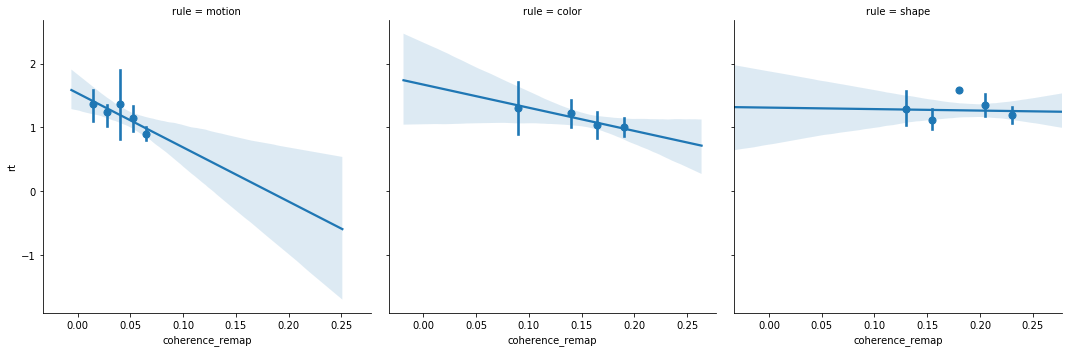

In [6]:
sns.lmplot(x="coherence_remap",
           y="rt",
           col="rule",
           x_bins = 6,
           data=df)

/Users/ianballard/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


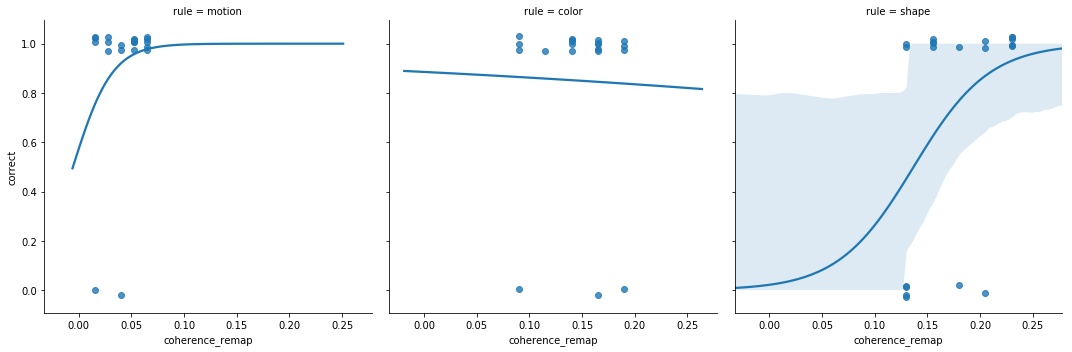

In [7]:
sns.lmplot(x="coherence_remap",
           y="correct",
           col="rule",
           logistic = True,
           y_jitter=.03,
           data=df)

In [8]:
df.groupby('rule').mean()

,rt,correct,block,color_coherence,motion_coherence,shape_coherence,coherence,coherence_remap
rule,,,,,,,,
color,1.141950,0.85,0,0.64625,0.075,0.68000,0.64625,0.14625
motion,1.176073,0.90,0,0.63750,0.085,0.68375,0.08500,0.04250
shape,1.270427,0.70,0,0.63625,0.080,0.67625,0.67625,0.17625


In [36]:
from psychopy import data
conditions=[
    {'label':'easy', 'startVal': 0.15, 'stepSizes' : .01, 'stepType': 'lin', 'minVal': .01, 'maxVal': 1, 'nUp': 1, 'nDown': 4},
    {'label':'hard','startVal': 0.1, 'stepSizes' : .01, 'stepType': 'lin', 'minVal': .01, 'maxVal': 1, 'nUp': 1, 'nDown': 1},
    ]
stairs = data.MultiStairHandler(conditions=conditions, nTrials=10)

In [38]:
# for thisIntensity, thisCondition in stairs:
#     print(thisIntensity, thisCondition['label'])
#     stairs.addResponse(int(1))


In [15]:
motion_resp = list(zip(['up','down'],
                 ['1','2']))
np.random.shuffle(motion_resp)

In [17]:
motion, correct_resp = motion_resp[0]

In [32]:
int(True)

1

In [109]:
min(combinedInten)

0.5686842105263157

0.6912975531294425


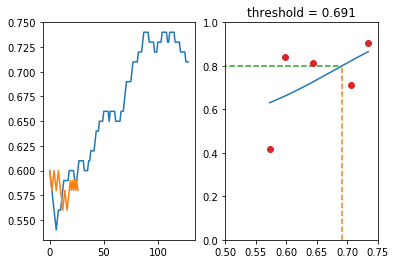

In [121]:
from psychopy import data, gui, core
from psychopy.tools.filetools import fromFile
import pylab
files = glob.glob(op.join(data_path,'*' + 'gabor' + '*1.psydat'))
#get the data from all the files
allIntensities, allResponses = [],[]
for thisFileName in files:
    thisDat = fromFile(thisFileName)
    for stair in thisDat.staircases:
        allIntensities.append( stair.intensities )
        allResponses.append( stair.data )

#plot each staircase
pylab.subplot(121)
colors = 'brgkcmbrgkcm'
lines, names = [],[]
for fileN, thisStair in enumerate(allIntensities):
    #lines.extend(pylab.plot(thisStair))
    #names = files[fileN]
    pylab.plot(thisStair, label=files[0])
#pylab.legend()

#get combined data
combinedInten, combinedResp, combinedN = \
             data.functionFromStaircase(allIntensities, allResponses, 5)
#fit curve - in this case using a Weibull function
fit = data.FitWeibull(combinedInten, combinedResp, guess=[0.2, 0.5])
smoothInt = pylab.arange(min(combinedInten), max(combinedInten), 0.001)
smoothResp = fit.eval(smoothInt)
thresh = fit.inverse(0.8)
print(thresh)

#plot curve
pylab.subplot(122)
pylab.plot(smoothInt, smoothResp, '-')
pylab.plot([thresh, thresh],[0,0.8],'--'); pylab.plot([0, thresh],\
[0.8,0.8],'--')
pylab.title('threshold = %0.3f' %(thresh))
#plot points
pylab.plot(combinedInten, combinedResp, 'o')
pylab.ylim([0,1])
pylab.xlim([.5,.75])

pylab.show()

0.03719616907446806


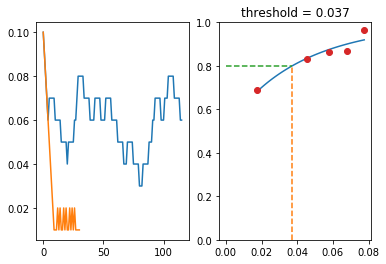

In [115]:
np.median(thisDat.staircases[1].reversalIntensities[-6:])

0.515

In [116]:
np.median(thisDat.staircases[0].reversalIntensities[-6:])

0.7050000000000001

In [92]:
fit.inverse(0.51)

0.0006378686042561404

In [73]:
a.

''

In [75]:
thisStair

[0.1,
 0.09000000000000001,
 0.08000000000000002,
 0.07000000000000002,
 0.06000000000000002,
 0.07000000000000002,
 0.06000000000000002,
 0.05000000000000002,
 0.040000000000000015,
 0.030000000000000013,
 0.040000000000000015,
 0.030000000000000013,
 0.02000000000000001]

In [89]:
fit.inverse(0.5)

0.0

In [4]:
from psychopy import data
import numpy as np
conditions=[
    # {'label':'easy', 'startVal': 0.6, 'stepSizes' : .01, 'stepType': 'lin', 'minVal': .51, 'maxVal': 1, 'nUp': 1, 'nDown': 5, 'nReversals': 15},
    {'label':'hard',
    'startVal': .2,
    'stepSizes' : .01,
    'stepType': 'lin',
    'minVal': 0,
    'maxVal': 1,
    'nUp': 1, 'nDown': 1,
    'nReversals': 3},
    ]
stairs = data.MultiStairHandler(conditions=conditions, nTrials=10)

In [5]:
for intensity, staircase in stairs:
    stairs.addResponse(np.random.choice([0,1]))


In [10]:
a = stairs.staircases[0].reversalIntensities

In [11]:
a

[0.21000000000000002, 0.19, 0.22000000000000003, 0.2, 0.21000000000000002]

In [ ]:
vnmbmv